<a href="https://colab.research.google.com/github/SharvariCodes/US-Accidents-EDA/blob/main/US_accidents_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
aa!nvidia-smi

Fri Jan 27 09:50:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **Preparing for the downloads of the dataset**

* list the assumptions here.

1. data of all the 50/52 states is not present. hence, some of the states are left out during the analysis.

In [ ]:
# kaggle json api key
!gdown --id 1wtmhEgaiHXZ8FD93Bnabe_gPBX6UgMIT

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wtmhEgaiHXZ8FD93Bnabe_gPBX6UgMIT
To: /content/kaggle.json
100% 74.0/74.0 [00:00<00:00, 117kB/s]


In [ ]:
!ls /content

kaggle.json  sample_data


In [ ]:
!mkdir /root/.kaggle
!cp /content/kaggle.json /root/.kaggle/kaggle.json

 #Copy kaggle.json to the required dir

In [ ]:
!ls ~/.kaggle/

kaggle.json


In [ ]:
!ls -l ~/.kaggle/

total 4
-rw-r--r-- 1 root root 74 Jan 25 17:32 kaggle.json


In [ ]:
!ls -a /root

.   .bashrc  .config   .jupyter  .keras  .npm	   .tmux.conf
..  .cache   .ipython  .kaggle	 .local  .profile  .wget-hsts


In [ ]:
!ls -la ~/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 Jan 24 11:25 .
drwx------ 1 root root 4096 Jan 24 11:25 ..
-rw-r--r-- 1 root root   74 Jan 24 11:25 kaggle.json


In [ ]:
!ls -lah ~/.kaggle/

total 16K
drwxr-xr-x 2 root root 4.0K Jan 24 11:25 .
drwx------ 1 root root 4.0K Jan 24 11:25 ..
-rw-r--r-- 1 root root   74 Jan 24 11:25 kaggle.json


In [ ]:
!ls -lah ~/.kaggle/

total 16K
drwxr-xr-x 2 root root 4.0K Jan 24 11:25 .
drwx------ 1 root root 4.0K Jan 24 11:25 ..
-rw-r--r-- 1 root root   74 Jan 24 11:25 kaggle.json


## **Downloading the dataset from kaggle**

In [ ]:
!kaggle datasets download sobhanmoosavi/us-accidents

 94% 253M/269M [00:01<00:00, 182MB/s]
100% 269M/269M [00:01<00:00, 176MB/s]


In [ ]:
!unzip us-accidents

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec21_updated.csv  


## **Data Preparation and Cleaning**

  1. Load the file using Pandas
  2. Look at information about the data and the columns, basically what the data is communicating to us.
  3. Fix any missing or incorrect values.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
# df.head(100)

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
# checking how many numeric columns are present in the dataset
numerics = ['int16', 'int32','int64','float16','float32','float64']
numeric_dtypes = df.select_dtypes(include=numerics)
len(numeric_dtypes.columns)

14

Percentage of missing values per column

In [ ]:
df.isna().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

* **Number column depicts the number of the street where accident has taken place. Since number is part of the address entity and it contains around 1.7 million empty records, it is safe to drop the column altogether.**

In [ ]:
df = df.drop(axis=1, columns='Number')

In [ ]:
df.isna().sum().sort_values(ascending=False)

Precipitation(in)        549458
Wind_Chill(F)            469643
Wind_Speed(mph)          157944
Wind_Direction            73775
Humidity(%)               73092
Weather_Condition         70636
Visibility(mi)            70546
Temperature(F)            69274
Pressure(in)              59200
Weather_Timestamp         50736
Airport_Code               9549
Timezone                   3659
Nautical_Twilight          2867
Civil_Twilight             2867
Sunrise_Sunset             2867
Astronomical_Twilight      2867
Zipcode                    1319
City                        137
Street                        2
Country                       0
Junction                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Turning_Loop                  0
Traffic_Signal                0
Traffic_Calming               0
Stop                          0
Station                       0
Roundabout                    0
Railway                       0
No_Exit 

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

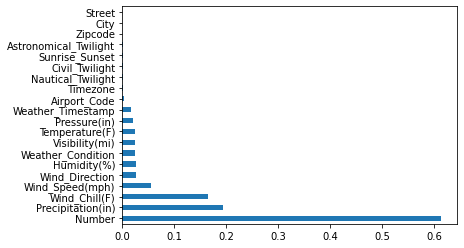

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

* **Checking the data in the columns to see if the columns itself are relevant or not** 

In [ ]:
df['Precipitation(in)'].value_counts()[0.00]

2104242

In [ ]:
df['Precipitation(in)'].isna().sum()

549458

So, 2104242 zero values + 549458 nulls = ~2.6M values completely useless from analysis POV.

Hence, dropping 'Precipitation(in)' 

In [ ]:
df = df.drop(axis=1, columns='Precipitation(in)')

In [ ]:
df['Wind_Chill(F)'].isna().sum()

469643

* **Dropping NaN values from all the columns of the DataFrame**

In [ ]:
df.shape

(2845342, 45)

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.shape

(2355617, 45)

In [ ]:
df.isna().sum().sort_values(ascending=False)

ID                       0
Pressure(in)             0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Visibility(mi)           0
Humidity(%)              0
Severity                 0
Wind_Chill(F)            0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
S

* **Checking for the presence of duplicate values and if present, eradicating them.**

In [ ]:
duplicated_values = df.duplicated(keep='first')

In [ ]:
duplicated_values[duplicated_values == False]

0          False
4          False
5          False
7          False
8          False
           ...  
2845337    False
2845338    False
2845339    False
2845340    False
2845341    False
Length: 2355617, dtype: bool

In [ ]:
duplicated_values[duplicated_values == True]

Series([], dtype: bool)

No duplicates present ! :)

Loading it back to .csv for visualization in Power BI.

In [ ]:
df.to_csv("US-Accidents-updated.csv")

## **Questions that lead to meaningful insights**

1. Are there more accidents in the cold or warm areas?
2. Which 5 states has the highest number of accidents? How about per 
capita?
3. New York doesn't show up in thetop 20 cities with highest number of accidents despite having the highest population. Why? Also to note, population of a particular city in the dataset would have added a spice in the analysis.
4. Among the top 100 cities in the number of accidents, which state do they belong to most frequently?
5. What time of the day are accidents most frequent?
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of the accidents year over year (decreasing / increasing)?
9. When is accidents per unit of traffic the highest?
10. Is the distribution of accidents by hour the same on weekends as on weekdays?
11. Weather wise analysis

## **Exploratory Analysis and Visualization**

To answer the questions above, we shall analyze the following columns.

1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition



#### City column analysis

In [ ]:
cities = df.City.unique()
len(cities)

10259

In [ ]:
# count of values in pandas. Used for showing top accidents in cities.
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           97730
Los Angeles                     56478
Orlando                         49725
Dallas                          33901
Houston                         29044
                                ...  
Taylor Mill                         1
Byars                               1
New Sweden                          1
Miromar Lakes                       1
American Fork-Pleasant Grove        1
Name: City, Length: 10259, dtype: int64

In [ ]:
len(cities_by_accident)

10259

In [ ]:
# top 10, 20 cities with highest accidents
cities_by_accident[:10]
cities_by_accident[:20]

Miami           97730
Los Angeles     56478
Orlando         49725
Dallas          33901
Houston         29044
Sacramento      28816
Charlotte       25166
San Diego       22011
Raleigh         21134
Minneapolis     20930
Nashville       18467
Portland        17391
Baton Rouge     17132
Austin          15381
Saint Paul      15184
New Orleans     15129
Phoenix         13045
Tucson          12930
Richmond        12465
Jacksonville    12133
Name: City, dtype: int64

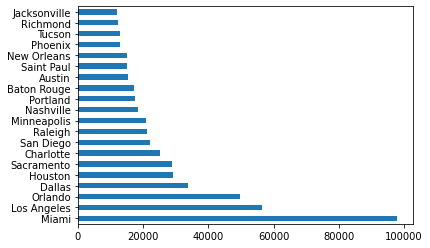

In [ ]:
cities_by_accident[:20].plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


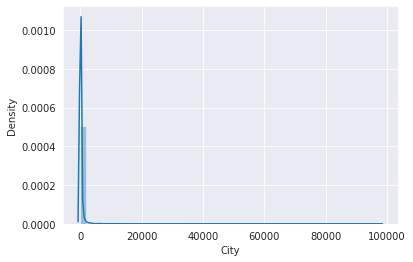

In [ ]:
sns.distplot(cities_by_accident)

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [ ]:
percent_accidents_high = (len(high_accident_cities) / len(cities))*100
print(f'{percent_accidents_high:.2f} % of cities have the highest accidents.')

3.86 % of cities have the highest accidents.


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


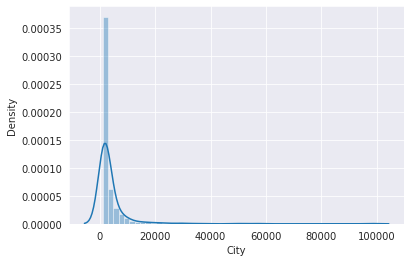

In [ ]:
# distplot for the high accidents cities.
sns.distplot(high_accident_cities)

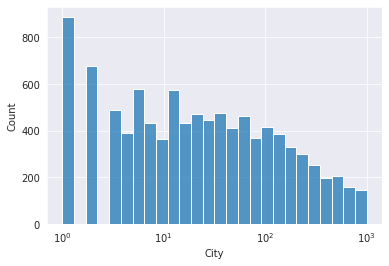

In [ ]:
# distplot for the low accidents cities.
sns.histplot(low_accident_cities, log_scale=True)

In [ ]:
# major chunk of data falls between 10-100 and 100-1000 accidents. ALtough,
# there is still some amount of data which has accidents between 1-10. This 
# could indicate that some of the cities have missing data. Checking for the 
# missing data now

cities_by_accident[cities_by_accident == 1]

Assaria                         1
Oceanport                       1
Forest Falls                    1
Buncombe                        1
Nowata                          1
                               ..
Taylor Mill                     1
Byars                           1
New Sweden                      1
Miromar Lakes                   1
American Fork-Pleasant Grove    1
Name: City, Length: 888, dtype: int64

In [ ]:
cities_by_accident[cities_by_accident == 'Sekiu']

Series([], Name: City, dtype: int64)

In [ ]:
percent_top_cities = (125/len(cities)) * 100
percent_top_cities

1.2184423433083147

In [ ]:
total_accidents = cities_by_accident.sum()
accidents_top_cities = cities_by_accident[:125].sum()

In [ ]:
percent_accident_top_cities = (accidents_top_cities / total_accidents) * 100

summarising:


In [ ]:
print(f'{percent_top_cities: .1f}% cities have {percent_accident_top_cities:.2f} % acidents, which is 125 of the total ciities!')

 1.2% cities have 45.38 % acidents, which is 125 of the total ciities!


one line approach. Here we find the top 1 % of cities!

In [ ]:
cities_by_accident[:int(len(cities_by_accident)*0.01)].sum()/cities_by_accident.sum()

0.4251204673764878

In [ ]:
print(f"Top 1% of the total cities have {(cities_by_accident[:int(len(cities_by_accident)*0.01)].sum()/cities_by_accident.sum())*100:.2f}% of accidents!")

Top 1% of the total cities have 42.51% of accidents!


In [ ]:
# Answering 3. here. Since there is no data for New York present, we can't use it for the analysis
'New York' in df.City
'NY' in df.State

False

In [ ]:
states = df.State.unique()
len(states)

49

**City Column Insights**

*  3.86 % of cities have over 1000 accidents annually.
*  Top accident cities include Maimi, Los Angeles, Orlando, Dallas and Houston.
* 1.2% cities have 45.38 % acidents, which is top 125 of the total ciities!
* Top 1% of the total cities have 42.51% of accidents!


#### Start Time column analysis

In [ ]:
df.Start_Time

0          2016-02-08 00:37:08
4          2016-02-08 07:53:43
5          2016-02-08 08:16:57
7          2016-02-08 11:51:46
8          2016-02-08 14:19:57
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2355617, dtype: object

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

In [ ]:
df.Start_Time.dt.hour

0           0
4           7
5           8
7          11
8          14
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2355617, dtype: int64

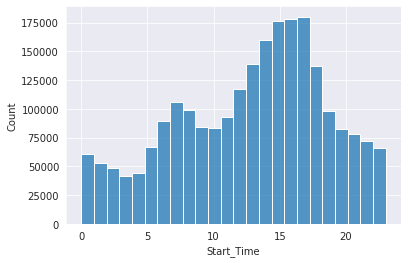

In [ ]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


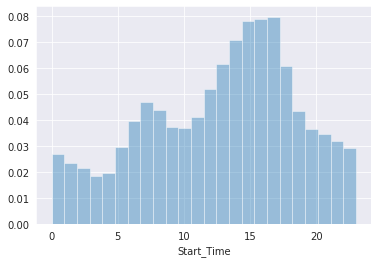

In [ ]:
# plotting number of accidents by the time they occur in a distplot
sns.distplot(df.Start_Time.dt.hour, norm_hist=True, bins=24, kde=False)

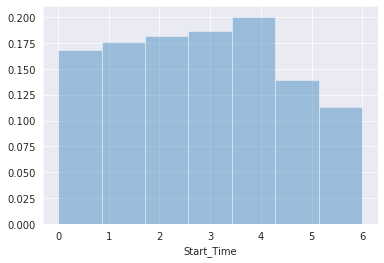

In [ ]:
# plotting number of accidents that occur every day of the week
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

In [ ]:
weekends = df.Start_Time[df.Start_Time.dt.dayofweek > 4]

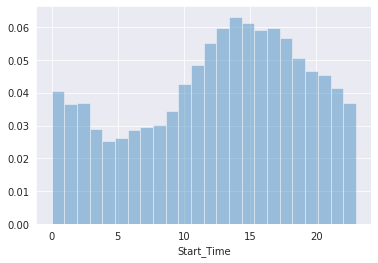

In [ ]:
# Answered 10. here. Hourly distribution of accidents on weekends. 
sns.distplot(weekends.dt.hour, bins=24, kde=False, norm_hist=True)

In [ ]:
weekdays = df.Start_Time[df.Start_Time.dt.dayofweek <= 4]

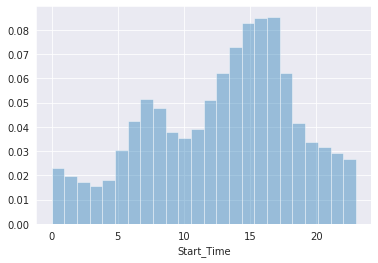

In [ ]:
# hourly accident trends on weekdays
sns.distplot(weekdays.dt.hour, bins=24, kde=False, norm_hist=True)

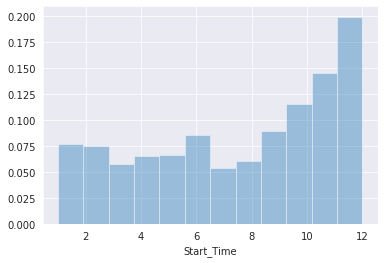

In [ ]:
# monthly trend on the start time, i.e, when the accidents take place.
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

In [ ]:
# year-wise trend on accidents
df.Start_Time.dt.year
# accidents exclusive to 2019
df_2019 = df[df.Start_Time.dt.year == 2019]

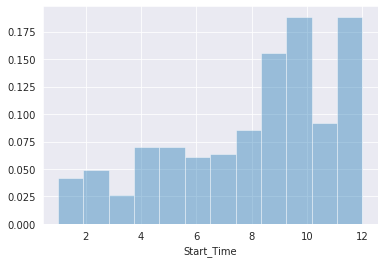

In [ ]:
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

In [ ]:
# looking out for missing data through the source where the data came from
df_2019_Bing = df_2019[df_2019.Source == 'Bing']

AttributeError: ignored

#### Start Latittude and Start Longitude Columns Analysis

In [ ]:
df.Start_Lat

0          40.108910
4          39.172393
5          39.063240
7          41.375310
8          40.702247
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2355617, dtype: float64

In [ ]:
df.Start_Lng

0          -83.092860
4          -84.492792
5          -84.032430
7          -81.820170
8          -84.075887
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2355617, dtype: float64

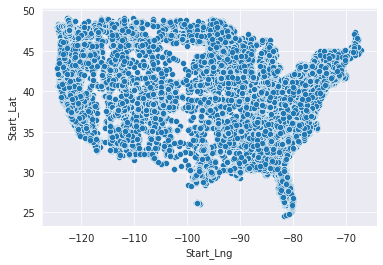

In [ ]:
# scatterplot to know more about the points
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

In [ ]:
# since the above scatterplot is too crowded, taking a scatterplot of 10% of
# the dataframe
sample_10_percent = df.sample(int(0.1*len(df)))

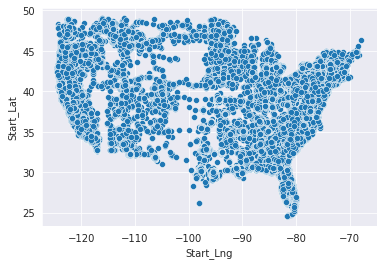

In [ ]:
sns.scatterplot(x=sample_10_percent.Start_Lng, y=sample_10_percent.Start_Lat)

In [ ]:
# plotting the above scatterplot on a real map
import folium

In [ ]:
folium.Map()

In [ ]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]

In [ ]:
# locating a single (x,y) co-ordinate on the map using folium
map = folium.Map()
marker = folium.Marker((lat,lon))
marker.add_to(map)
map

In [ ]:
# Heatmap using folium
from folium.plugins import HeatMap

In [ ]:
list(zip(list(df.Start_Lat), list(df.Start_Lng)))

[(40.10891, -83.09286),
 (39.172393, -84.49279200000002),
 (39.06324, -84.03243),
 (41.37531, -81.82016999999998),
 (40.702247, -84.075887),
 (40.10931, -82.96849),
 (39.19288, -84.47723),
 (39.13877, -84.53394),
 (41.4739, -81.704233),
 (39.582242, -83.677814),
 (40.02664, -82.9944),
 (41.679361, -83.573037),
 (40.99613, -85.26613),
 (39.0381, -84.59243000000002),
 (40.03386, -82.99601),
 (39.85798, -84.28181),
 (39.15267, -84.5395),
 (39.30732, -85.95982),
 (39.77572, -84.04815),
 (39.97643, -83.12306),
 (39.58595, -85.82518),
 (39.3638, -85.51659000000002),
 (39.45132, -85.62516),
 (39.75067, -84.14148),
 (39.2675, -81.49929),
 (39.86025, -85.96623000000002),
 (41.95677, -83.67214),
 (38.27401, -85.74844),
 (41.95677, -83.67214),
 (40.52225, -80.06666),
 (40.487814, -80.009439),
 (40.156298, -83.018431),
 (41.47461, -81.71181999999997),
 (41.0618, -81.54608),
 (40.45112, -85.15048),
 (40.35429, -85.14993),
 (39.75855, -85.13715),
 (39.74408, -85.13749),
 (39.965148, -83.020499),
 (4

In [ ]:
heat_marker = HeatMap(list(zip(list(df.Start_Lat), list(df.Start_Lng))))

In [ ]:
heat_marker.add_to(map)
map

AttributeError: ignored

#### Weather condition column and temperature column

In [ ]:
accidents_by_weather = df.Weather_Condition.value_counts()

In [ ]:
# how many Weather_Conditions are present?
len(df['Weather_Condition'].unique())

118

In [ ]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Snow', 'Light Snow', 'Cloudy',
       'Mostly Cloudy', 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain', 'Fair',
       'Fog', 'Patches of Fog', 'Light Freezing Fog',
       'Light Freezing Rain', 'Mist', 'Blowing Snow', 'Heavy Snow',
       'Snow Grains', 'Light Fog', 'Drizzle', 'Thunderstorms and Rain',
       'Heavy Rain', 'Light Ice Pellets', 'Thunder',
       'Thunder in the Vicinity', 'Fair / Windy',
       'Light Rain with Thunder', 'Heavy Thunderstorms and Snow',
       'Light Snow Showers', 'Cloudy / Windy', 'Heavy Drizzle',
       'Ice Pellets', 'N/A Precipitation', 'Light Thunderstorms and Rain',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Heavy Thunderstorms and Rain', 'Smoke',
       'Shallow Fog', 'Partly Cloudy / Windy', 'Heavy T-Storm',
       'Light Rain / Windy', 'Mostly Cloudy / Windy',
       'Blowing Dust / Windy', 'Blowing Dus

118 types of weather conditions. Now that's gonna be interesting!

[P.S. : Is it just me or did you all had any idea that weather conditions can exceed beyond rain, fog, cloudy and heat


In [ ]:
accidents_by_weather[:10]

Fair             1087062
Cloudy            343577
Mostly Cloudy     302387
Partly Cloudy     208872
Light Rain        108537
Light Snow         41916
Fog                38824
Haze               30539
Overcast           26311
Rain               25975
Name: Weather_Condition, dtype: int64

In [ ]:
high_accidents_weather = accidents_by_weather[accidents_by_weather > 20000]
low_accidents_weather = accidents_by_weather[accidents_by_weather <= 20000]

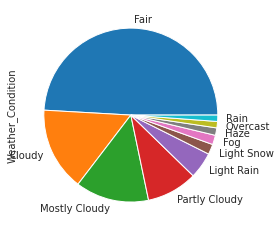

In [ ]:
accidents_by_weather[:10].plot(kind='pie')

The above pie chart is self explainatory. How ironic that most accidents occur when absolute nothing is wrong with the weather!

In [ ]:
fair_weather_percent = accidents_by_weather[0]/ high_accidents_weather.sum()

In [ ]:
print(f"{fair_weather_percent * 100: .2f} % of accidents are caused by the fair weather.")

 48.53 % of accidents are caused by the fair weather.


In [ ]:
temperatures = df['Temperature(F)']
temperature = np.array(temperatures)

In [ ]:
warm_temperatures = temperatures[temperatures > 62]
percent_warm_temperatures = len(warm_temperatures)/len(temperatures)
percent_cold_temperatures = len(temperatures[temperatures < 62])/len(temperatures)

In [ ]:
print(f"{percent_warm_temperatures * 100:.2f} % accidents are caused in areas with warm temperatures")

50.80 % accidents are caused in areas with warm temperatures


In [ ]:
print(f"{percent_cold_temperatures * 100:.2f} % accidents are caused in areas with warm temperatures")

47.67 % accidents are caused in areas with warm temperatures


#### States column

In [ ]:
states_by_accidents = df.State.value_counts()

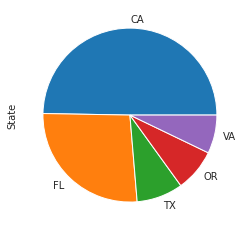

In [ ]:
states_by_accidents[:5].plot(kind='pie')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


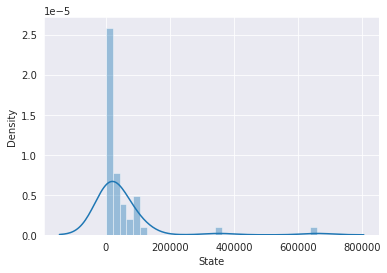

In [ ]:
sns.distplot(states_by_accidents)

In [ ]:
high_accident_states = states_by_accidents[states_by_accidents > 1000 ]
low_accident_states = states_by_accidents[states_by_accidents <= 1000 ]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


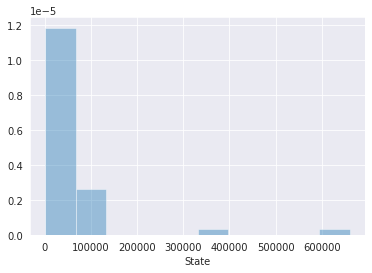

In [ ]:
sns.distplot(high_accident_states, bins=10, kde=False, norm_hist=True)

## **Summary and Conclusion**

**Some assumption about the dataset**:

* No data for 2-3 States (including new york)
* Some of the cities present in the dataset are not in the United States.
* Source column has been removed in the updated version. Hence, source-related analysis cannot be performed. Also, there is a lot less missing data in the updated version of the dataset.

**City Column Insights**

*  3.86 % of cities have over 1000 accidents annually.
*  Top accident cities include Maimi, Los Angeles, Orlando, Dallas and Houston.
* 1.2% cities have 45.38 % acidents, which is top 125 of the total ciities!
* Top 1% of the total cities have 42.51% of accidents!
* Over 1200 cities have reported just one accident.That is because they are relatively small cities with a smaller population and hence, data may or may not have been properly noted.

**States Column Insights**
* California has the highest percent of accidents.Nearly 50% of all the accidents in the US happen in California.
* California, Florida and Texas are the states with more than 80 % of all accidents, which also confirms the analysis of our city column as all of the top 5 cities belong to these states.

**Time Column Insights**

* A high percentage of accidents occur during 3 pm - 6 pm (Probably people in a hurry to leave work or traffic higher)
* Next highest percentage of accidents occur during 8 am - 10 am.
* On Weekends, the accidents usually occur between 10 am to 3 pm. In contrast, on weekdays, the accidents occur usually between 8 am - 10 am as the second highest, and 3 pm - 6 pm as the highest.
* Accidents occuring in winter are much higher than those occuring in summer. (month-wise analysis)
* The yearly trend of accidents gives a much better insight on the number of accidents taking place in each month for that particular year. The data for January 2016 and a few months of the year 2020 is missing. It should be noted here that missing data does NOT constitute major chunk and it can fixed.

**Start Latitude and Start Longitude Column Insights**
* The scatterplot depicts that concentration of the accidents is much higher on the coastal and urban areas than in the central parts of the country.

**Weather Column Insights**
* 48.53 % of accidents are caused by the fair weather.
* The percentage of accidents in extreme weather conditions like snowfall or thunderstorm is ironically low, as shown in the pie chart.

**Temperature Column Insights**
* 50.80 % accidents are caused in areas with warm temperatures.
* 47.67 % accidents are caused in areas with cold temperatures.
* It shall be noted here that the warm temperatures are temperatures above 62 F while cold are below it. This analysis can vary with the baseline as to what one percieves as "warm" or "cold".


